In [1]:
import control
import torch
import numpy as np
from torch.utils.data import DataLoader
from net_identification_utils import ControlLSTMInputs,\
    train,\
    test,\
    ControlDataset,\
    plot_discrete_output,\
    generate_data_for_rnn,\
    hyper_search

In [2]:
system = control.TransferFunction(np.array([1, 0]), np.array([1, -7/12, 1/4, -1/24]), 1)

In [3]:
train_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [26]:
model = ControlLSTMInputs(
    window_size=100, layer_input_size=20, hidden_size=70, output_size=20, num_layers=2
)

In [27]:
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [28]:
train(model, 100, train_dataloader, torch.nn.MSELoss())

epoch 0, mse 0.1321497281966731
epoch 1, mse 0.004447541735135019
epoch 2, mse 0.0011431687863660044
epoch 3, mse 0.00047041169498697856
epoch 4, mse 0.00030476591186015864
epoch 5, mse 0.00024910458181693685
epoch 6, mse 0.00020092003025638406
epoch 7, mse 0.00016806039508082904
epoch 8, mse 0.00014427713489567395
epoch 9, mse 0.00014647069579950766
epoch 10, mse 0.00010835214161488693
epoch 11, mse 9.72216629088507e-05
epoch 12, mse 7.513302374718477e-05
epoch 13, mse 6.783271011954639e-05
epoch 14, mse 6.671666105830809e-05
epoch 15, mse 6.103392697696108e-05
epoch 16, mse 7.252538598550018e-05
epoch 17, mse 5.463615405460587e-05
epoch 18, mse 4.80927146236354e-05
epoch 19, mse 5.7267797346867154e-05
epoch 20, mse 4.8679594983696005e-05
epoch 21, mse 0.000105737065186986
epoch 22, mse 0.00010106439160153968
epoch 23, mse 3.261260881117778e-05
epoch 24, mse 3.2153076917893484e-05
epoch 25, mse 3.922011931535962e-05
epoch 26, mse 0.000127633392730786
epoch 27, mse 8.948451300966554e-0

In [7]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [8]:
prediction = model(test_dataset[0][0].view(1, -1))

In [9]:
test(model, DataLoader(test_dataset, batch_size=10, shuffle=True), torch.nn.MSELoss())

1.029121605824912e-05

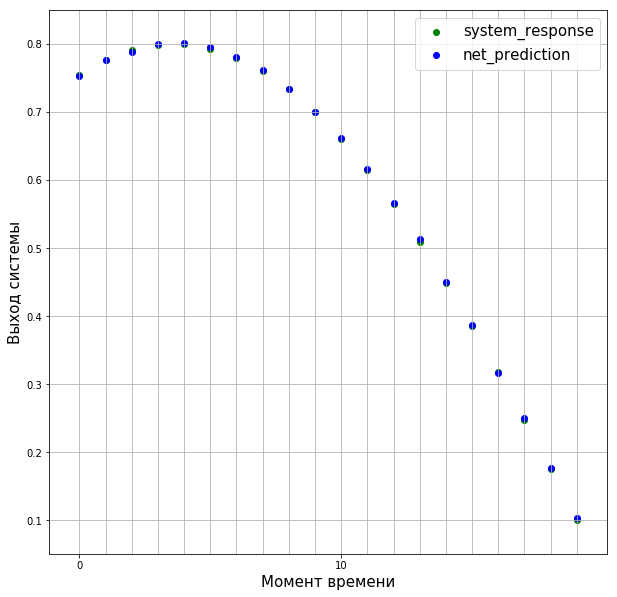

In [10]:
plot_discrete_output(
    system_response=test_dataset[1][1],
    net_prediction=model(test_dataset[1][0])
)
# test signal frequency not shifted relative to train signal

### concatenated prediction

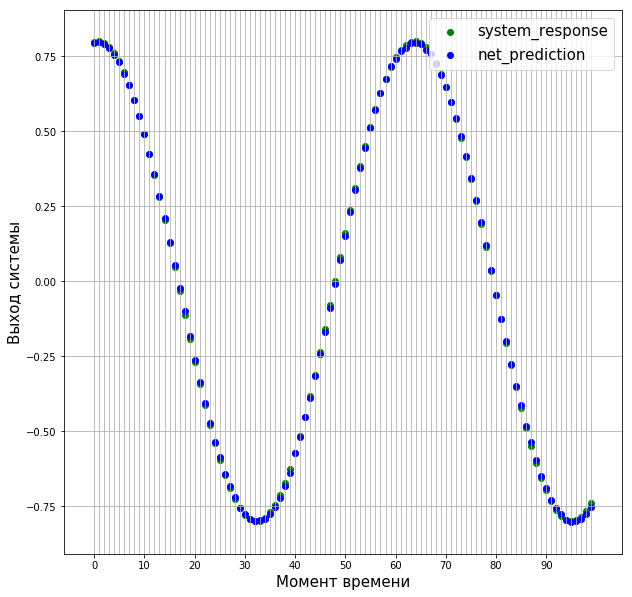

In [11]:
u = np.sin(np.arange(1000) * 0.1) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

###  prediction on input signal with shifted frequency relative to train data

In [15]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) / 2
)

In [16]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [17]:
test(model, test_dataloader, torch.nn.MSELoss())

0.06511564044169972

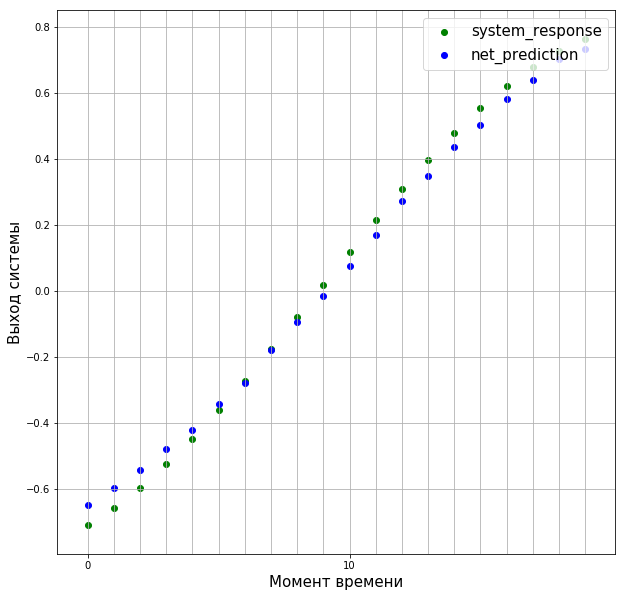

In [18]:
plot_discrete_output(
    system_response=test_dataset[0][1],
    net_prediction=model(test_dataset[0][0])
)

### concatenated prediction

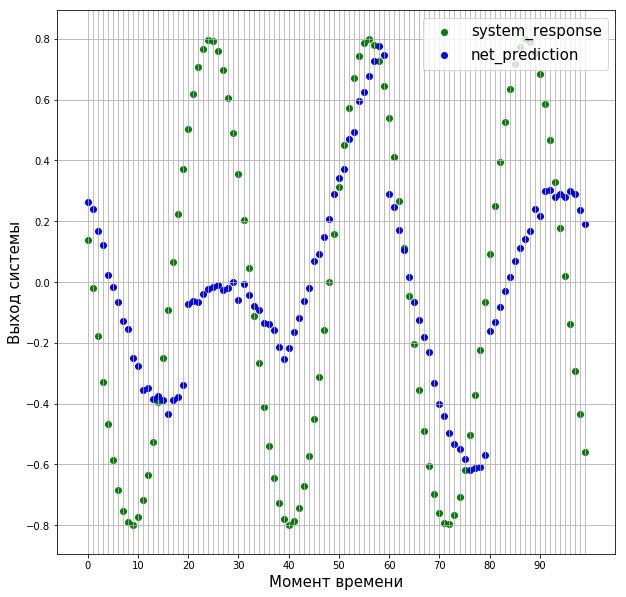

In [29]:
# frequency 0.2
u = np.sin(np.arange(1000) * 0.2) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_long_0_2.png'
)

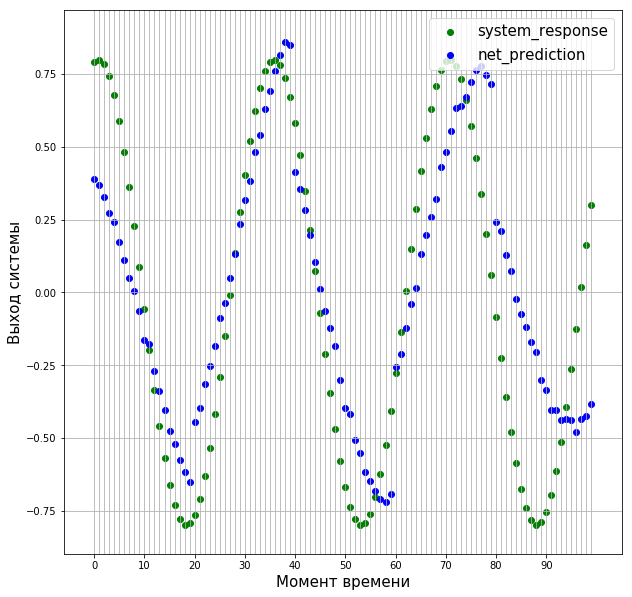

In [30]:
# frequency 0.18
u = np.sin(np.arange(1000) * 0.18) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

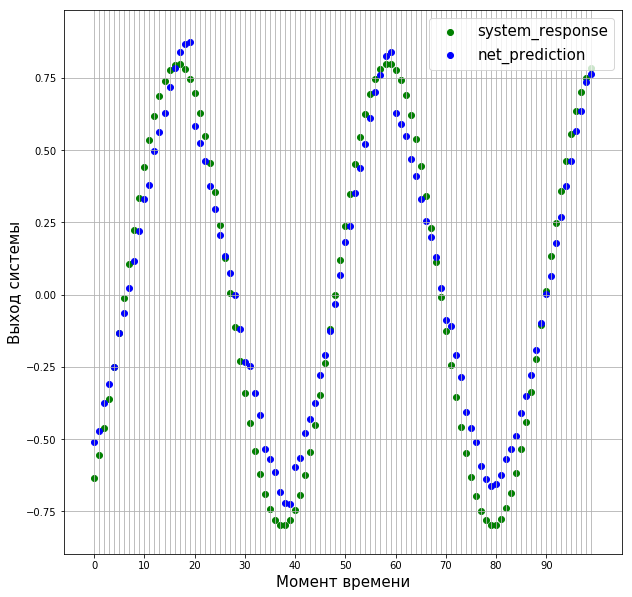

In [31]:
# frequency 0.15
u = np.sin(np.arange(1000) * 0.15) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_long_0_15.png'
)

### sinus mixture as input

In [20]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,
    u_signal_generation_func=lambda x:
    (   # random mixture of two sinus with different frequencies
        np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) + 
        np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1))
    ) / 4
)

In [21]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [22]:
test(model, test_dataloader, torch.nn.MSELoss())

0.020396024022273196

### concatenated prediction

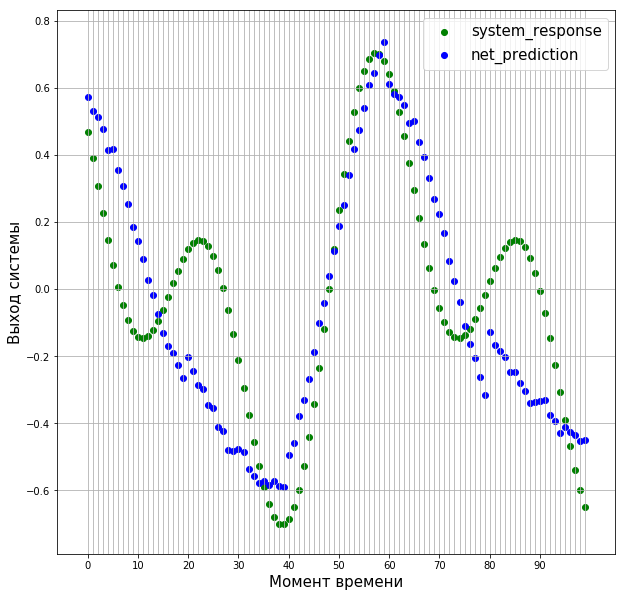

In [23]:
# mixture of sinuses with frequency 0.1 and 0.2
u = (np.sin(np.arange(1000) * 0.2) + np.sin(np.arange(1000) * 0.1)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_mix_0_1_0_2.png'
)

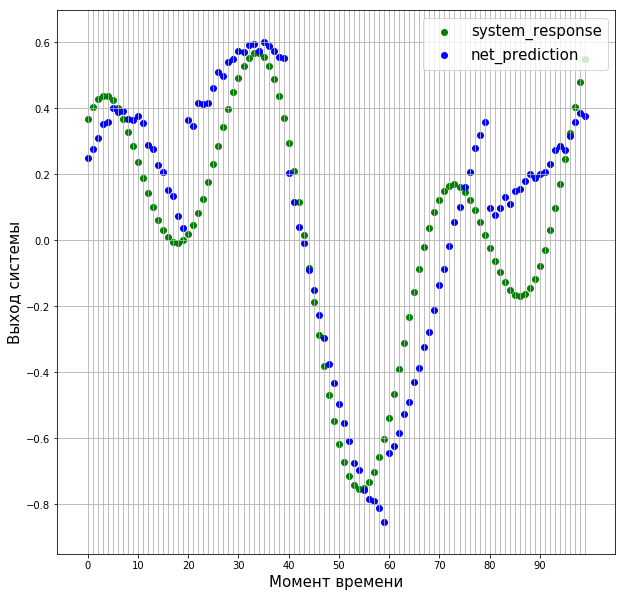

In [24]:
# mixture of sinuses with frequency 0.08 and 0.18
u = (np.sin(np.arange(1000) * 0.18) + np.sin(np.arange(1000) * 0.08)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

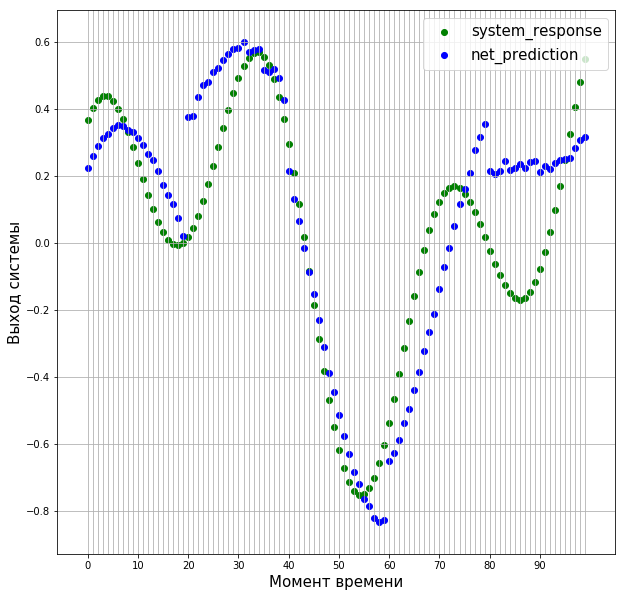

In [21]:
# mixture of sinuses with frequency 0.05 and 0.15
u = (np.sin(np.arange(1000) * 0.18) + np.sin(np.arange(1000) * 0.08)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_mix_0_05_0_15.png'
)

### magnitude increase

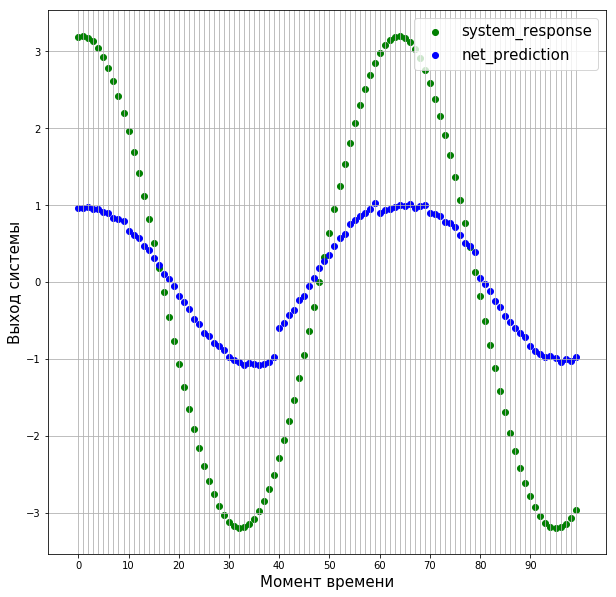

In [25]:
u = np.sin(np.arange(1000) * 0.1) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_high_magnitude.png'
)

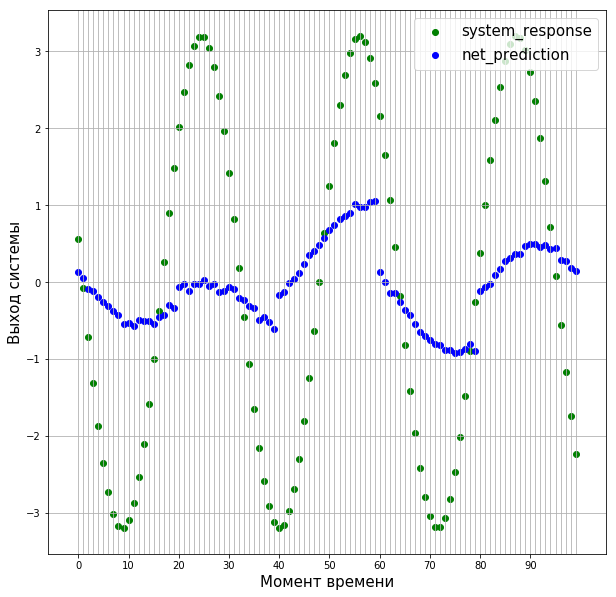

In [26]:
u = np.sin(np.arange(1000) * 0.2) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

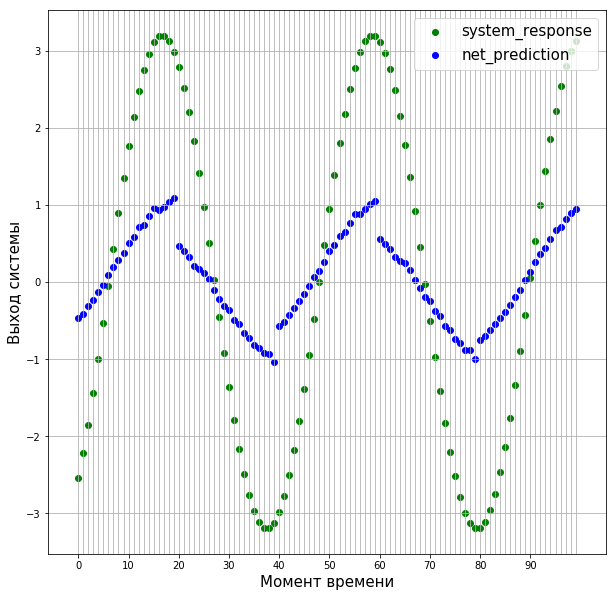

In [27]:
u = np.sin(np.arange(1000) * 0.15) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

### hyper search

In [ ]:
window_size=100, layer_input_size=20, hidden_size=50, output_size=20, num_layers=2

In [33]:
from tqdm import tqdm_notebook as tqdm

In [20]:
for elem in train_dataloader:
    break

In [22]:
elem[:-1]

[tensor([[-0.4315, -0.4452, -0.4575, -0.4683, -0.4775, -0.4852, -0.4913, -0.4958,
          -0.4987, -0.4999, -0.4996, -0.4975, -0.4939, -0.4886, -0.4818, -0.4733,
          -0.4633, -0.4518, -0.4388, -0.4244, -0.4086, -0.3915, -0.3731, -0.3534,
          -0.3326, -0.3108, -0.2879, -0.2640, -0.2393, -0.2138, -0.1877, -0.1609,
          -0.1335, -0.1058, -0.0777, -0.0493, -0.0208,  0.0078,  0.0364,  0.0648,
           0.0930,  0.1210,  0.1485,  0.1755,  0.2020,  0.2278,  0.2529,  0.2771,
           0.3005,  0.3228,  0.3441,  0.3643,  0.3833,  0.4010,  0.4174,  0.4325,
           0.4461,  0.4583,  0.4690,  0.4781,  0.4857,  0.4917,  0.4961,  0.4988,
           0.5000,  0.4995,  0.4973,  0.4936,  0.4882,  0.4812,  0.4727,  0.4626,
           0.4510,  0.4379,  0.4234,  0.4075,  0.3903,  0.3718,  0.3521,  0.3312,
           0.3092,  0.2863,  0.2624,  0.2376,  0.2121,  0.1859,  0.1590,  0.1317,
           0.1039,  0.0758,  0.0474,  0.0188, -0.0097, -0.0383, -0.0667, -0.0949,
          -0.122

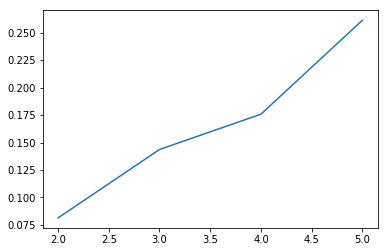

In [24]:
hyper_search(
    model_class=ControlLSTMInputs,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    default_init_args={
        'window_size': 100,
        'layer_input_size': 20,
        'hidden_size': 50,
        'output_size': 20,
        'num_layers': 2
    },
    arg_variants={'num_layers': list(range(2, 6))},
    train_epochs=50
)

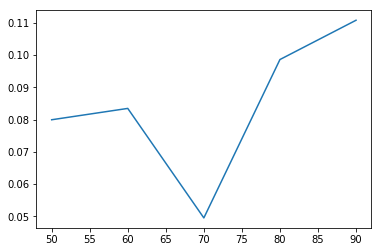

In [25]:
hyper_search(
    model_class=ControlLSTMInputs,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    default_init_args={
        'window_size': 100,
        'layer_input_size': 20,
        'hidden_size': 50,
        'output_size': 20,
        'num_layers': 2
    },
    arg_variants={'hidden_size': list(map(int, np.arange(5, 10) * 10))},
    train_epochs=50
)